

Name: Harshith Akkapelli

Dataset Link: [Graduate Admission 2](https://www.kaggle.com/datasets/mohansacharya/graduate-admissions?select=Admission_Predict.csv)

Task 1C: Regression


In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.4/484.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.5/17.5 MB 81.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 76.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 6.7 MB/s eta 0

In [ ]:
"""Mount Google Drive to access your data"""
from google.colab import drive #Import library
drive.mount('/content/drive') #Mount it

Mounted at /content/drive


In [ ]:
"""IMPORT DATA AND HANDLE MISSING VALUES"""
import pandas as pd #Import Library

"""Function to load and remove na valued rows"""
def importData(url):
  print("Started Reading Data")
  getData = pd.read_csv(url)
  print("Completed Reading Data")
  print(getData.head())
  print("Removing na values")
  getData = getData.dropna()
  print("Removed rows with na values")
  return getData

url = '/content/drive/MyDrive/1c.csv'
inputData = importData(url) #Call the Function

Started Reading Data
Completed Reading Data
   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
Removing na values
Removed rows with na values


In [ ]:
inputData.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
# import pycaret regression and init setup
from pycaret.regression import *
"""Function to set up the environment"""
def doSetUpOfPycaret(inputData,targetColumn):
  print("Setting up the environment")
  s = setup(inputData, target = targetColumn)
  print("Environment is set up")
  return s

targetColumn = "Chance of Admit " #Target Column name
s = doSetUpOfPycaret(inputData,targetColumn)#Call the Function

Setting up the environment


,Description,Value
0,Session id,2353
1,Target,Chance of Admit
2,Target type,Regression
3,Original data shape,"(400, 9)"
4,Transformed data shape,"(400, 9)"
5,Transformed train set shape,"(280, 9)"
6,Transformed test set shape,"(120, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


Environment is set up


Starting Training of models


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.0393,0.0029,0.0533,0.8675,0.0334,0.0641,0.9380
gbr,Gradient Boosting Regressor,0.0419,0.0032,0.0564,0.8502,0.0351,0.0681,0.0980
lightgbm,Light Gradient Boosting Machine,0.0439,0.0036,0.0598,0.8306,0.0374,0.0714,0.3290
xgboost,Extreme Gradient Boosting,0.0445,0.0039,0.0615,0.8193,0.0383,0.0714,0.0610
rf,Random Forest Regressor,0.0456,0.0040,0.0626,0.8131,0.0388,0.0733,0.4300
ridge,Ridge Regression,0.0467,0.0040,0.0629,0.8126,0.0390,0.0760,0.0310
lr,Linear Regression,0.0467,0.0040,0.0629,0.8125,0.0391,0.0760,0.5590
lar,Least Angle Regression,0.0467,0.0040,0.0629,0.8125,0.0391,0.0760,0.0320
br,Bayesian Ridge,0.0467,0.0040,0.0630,0.8120,0.0391,0.0761,0.0350
et,Extra Trees Regressor,0.0466,0.0041,0.0636,0.8077,0.0395,0.0756,0.3880


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

Completed Training of models
Plotting Residuals of final model


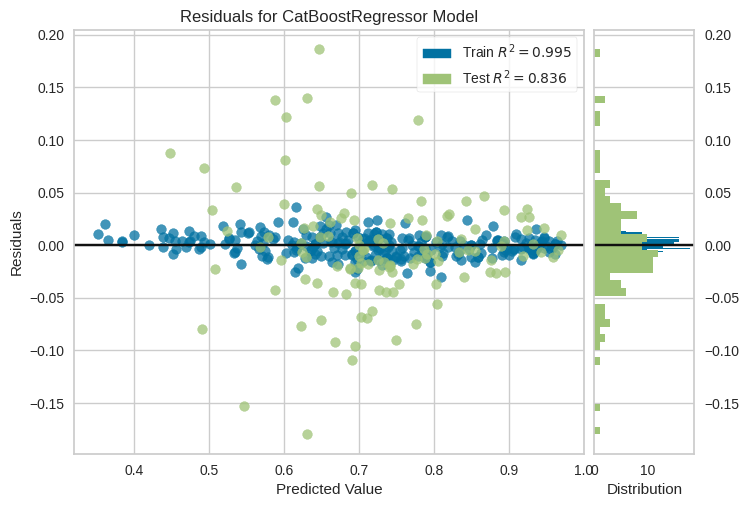

Printed Confusion Matric of final model
Plotting error curves of final model


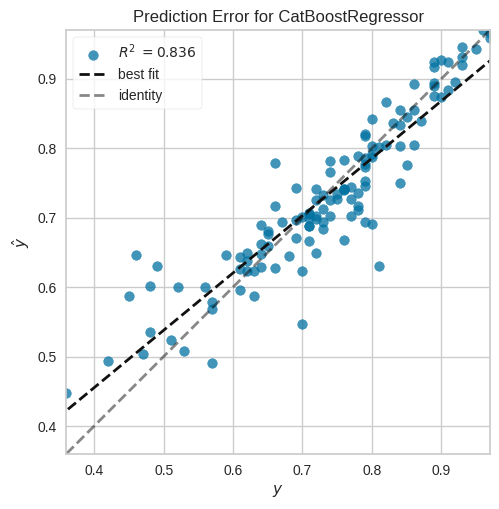

Plotte error curves of final model


In [ ]:
"""Function to Train and Evaluate the models"""
def trainAndBenchmarkModels():
  #Training Phase
  print("Starting Training of models")
  finalModel = compare_models()
  print("Completed Training of models")

  #Residuals
  print("Plotting Residuals of final model")
  plot_model(finalModel, plot = 'residuals')
  print("Printed Confusion Matric of final model")

  #Errors
  print("Plotting error curves of final model")
  plot_model(finalModel, plot = 'error')
  print("Plotte error curves of final model")


  #Return model
  return finalModel
finalModel = trainAndBenchmarkModels()

In [ ]:
"""Function to test the model"""
def testModel(finalModel):
  test = predict_model(finalModel)
  print(test.head())
testModel(finalModel)#Call the function

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.0362,0.0027,0.0518,0.8357,0.0316,0.0555


     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
32           33        338          118                  4  3.0   4.5  9.40   
372         373        336          119                  4  4.5   4.0  9.62   
95           96        304          100                  4  1.5   2.5  7.84   
11           12        327          111                  4  4.0   4.5  9.00   
205         206        295           99                  2  2.5   3.0  7.65   

     Research  Chance of Admit   prediction_label  
32          1              0.91          0.883341  
372         1              0.95          0.943125  
95          0              0.42          0.493025  
11          1              0.84          0.749775  
205         0              0.57          0.568005  


In [ ]:
eda() #Perform eda analysis

In [ ]:
create_app(finalModel)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
save_model(finalModel, 'final_pipeline') #Save the model

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Serial No.', 'GRE Score',
                                              'TOEFL Score', 'University Rating',
                                              'SOP', 'LOR ', 'CGPA',
                                              'Research'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  <catboost.core.CatBoostRegressor object at 0x7e64d11cc430>)]),
 'final_pipeline.pkl')